##Exploratory Data Analysis (EDA) for Weekly Sales Forecasting
This notebook performs exploratory data analysis (EDA) on the raw sales dataset provided for the forecasting assignment.

We will:

- Inspect the raw data structure and types.

- Clean and standardize date fields.

- Check categorical variables and unique values.

- Identify missing weeks for each SerialNum.

- Visualize weekly sales trends.

- Detect potential outliers.

Finally, export a cleaned dataset for use in modeling.

This EDA ensures our data is well-understood and properly formatted, making it ready for robust modeling and forecasting in the next phase.

At first, we load the raw dataset and perform a basic initial exploration:

In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv('Assessment.csv')

# Look at the first 5 rows
print(df.head())

# Check all column names
print(df.columns)

# Check data types
print(df.dtypes)

# Quick summary
print(df.info())

# Check for missing values
print(df.isnull().sum())


  weekend_date   channel brand category sub_category  SerailNum  quantity
0     4/6/2022  Channel1    B1     Cat2     Sub-Cat2          1        56
1    11/6/2022  Channel1    B1     Cat2     Sub-Cat2          1       122
2   18/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       102
3   25/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       128
4     2/7/2022  Channel1    B1     Cat2     Sub-Cat2          1        97
Index(['weekend_date', 'channel', 'brand', 'category', 'sub_category',
       'SerailNum', 'quantity'],
      dtype='object')
weekend_date    object
channel         object
brand           object
category        object
sub_category    object
SerailNum        int64
quantity         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 no

Now we focus on cleaning and standardizing the weekend_date column to ensure it's ready for time-series analysis. We start by splitting the string to keep only the date part and remove any time information that might be present. Next, we convert these cleaned strings into proper datetime objects, which allows us to perform reliable date-based operations later. We then replace the original column with this cleaned version and sort the entire DataFrame chronologically to maintain the correct time order. Finally, we check the data types and confirm the minimum and maximum dates to verify that the cleaning process was successful.

In [ ]:
# Split and keep only the date part before space
df['weekend_date_clean'] = df['weekend_date'].str.split(' ').str[0]

# Convert to datetime
df['weekend_date_clean'] = pd.to_datetime(df['weekend_date_clean'], dayfirst=True)

# Replace original column
df['weekend_date'] = df['weekend_date_clean']
df = df.drop(columns=['weekend_date_clean'])

# Sort
df = df.sort_values('weekend_date').reset_index(drop=True)

# Confirm
print(df.dtypes)
print(df['weekend_date'].min(), df['weekend_date'].max())


weekend_date    datetime64[ns]
channel                 object
brand                   object
category                object
sub_category            object
SerailNum                int64
quantity                 int64
dtype: object
2022-05-28 00:00:00 2024-08-31 00:00:00


In [ ]:
print(df['weekend_date'].isnull().sum())
print(len(df))
# Look at the first 5 rows
print(df.head())

0
600
  weekend_date   channel brand category sub_category  SerailNum  quantity
0   2022-05-28  Channel2    B1     Cat1     Sub-Cat1          5       203
1   2022-06-04  Channel2    B1     Cat1     Sub-Cat1          5       198
2   2022-06-04  Channel1    B1     Cat2     Sub-Cat2          1        56
3   2022-06-11  Channel2    B1     Cat1     Sub-Cat1          5       188
4   2022-06-11  Channel1    B1     Cat2     Sub-Cat2          1       122


Next, we explore the key categorical columns to understand the data's diversity and complexity. This gives us a sense of the data’s granularity and informs later modeling decisions, such as grouping, encoding, or filtering strategies.



In [ ]:
print('Unique channels:', df['channel'].nunique())
print('Unique brands:', df['brand'].nunique())
print('Unique categories:', df['category'].nunique())
print('Unique sub_categories:', df['sub_category'].nunique())
print('Unique SerialNums:', df['SerailNum'].nunique())


Unique channels: 3
Unique brands: 2
Unique categories: 3
Unique sub_categories: 4
Unique SerialNums: 5


After counting the unique entries, we print out the actual unique values in each categorical column. This helps verify the data's content, spot typos or inconsistencies, and plan for any required cleaning or grouping.

In [ ]:
print(df['channel'].unique())
print(df['brand'].unique())
print(df['category'].unique())
print(df['sub_category'].unique())
print(df['SerailNum'].unique())


['Channel2' 'Channel1' 'Channel3']
['B1' 'B2']
['Cat1' 'Cat2' 'Cat3']
['Sub-Cat1' 'Sub-Cat2' 'Sub-Cat3' 'Sub-Cat4']
[5 1 2 3 4]


Now we count how many records exist for each SerialNum.

- This shows data coverage and balance across products or items.

- Helps us see if some SerialNums have very few records (which may affect modeling or forecasting).

This step is essential for understanding data distribution before further analysis.

In [ ]:
serial_counts = df['SerailNum'].value_counts()
print(serial_counts)


SerailNum
4    157
1    118
2    110
5    109
3    106
Name: count, dtype: int64


### Insights

- Dataset includes 3 unique sales channels, 2 brands, 3 categories, and 4 sub-categories.
- There are 5 unique SerialNums, each representing a separate product or product line.
- All SerialNums have at least 100 weekly data points:
    - SerialNum 4 has the longest history (157 weeks).
    - SerialNum 3 has the fewest (106 weeks), but still acceptable.
- This suggests we can forecast each SerialNum individually.


Next We find the minimum and maximum dates in the dataset. It’s a quick sanity check to confirm the data range matches expectations.

In [ ]:
overall_min = df['weekend_date'].min()
overall_max = df['weekend_date'].max()

print('Overall date range:', overall_min, 'to', overall_max)


Overall date range: 2022-05-28 00:00:00 to 2024-08-31 00:00:00


In [ ]:
full_weekly_index = pd.date_range(start=overall_min, end=overall_max, freq='W-SAT')
print(full_weekly_index)


DatetimeIndex(['2022-05-28', '2022-06-04', '2022-06-11', '2022-06-18',
               '2022-06-25', '2022-07-02', '2022-07-09', '2022-07-16',
               '2022-07-23', '2022-07-30',
               ...
               '2024-06-29', '2024-07-06', '2024-07-13', '2024-07-20',
               '2024-07-27', '2024-08-03', '2024-08-10', '2024-08-17',
               '2024-08-24', '2024-08-31'],
              dtype='datetime64[ns]', length=119, freq='W-SAT')


As a next step, we loop through each unique SerialNum to carefully inspect the continuity of the weekly sales data. For each SerialNum, we extract its range of recorded dates and generate the complete list of expected weekly Saturdays within that range. By comparing the expected dates to the actual ones in our data, we can identify any missing weeks.

This is an important diagnostic step in time-series analysis: gaps in the data can cause problems when building lag or rolling features later. By checking and listing the missing dates here, we ensure we’re aware of where any imputation or filling might be required in preprocessing.

In [ ]:
serials = df['SerailNum'].unique()

for serial in serials:
    df_serial = df[df['SerailNum'] == serial]
    serial_dates = pd.to_datetime(df_serial['weekend_date']).sort_values()

    # Create expected full range
    expected_dates = pd.date_range(start=serial_dates.min(), end=serial_dates.max(), freq='W-SAT')

    # Find missing dates
    missing = expected_dates.difference(serial_dates)

    print(f'\nSerialNum {serial}:')
    if len(missing) == 0:
        print('No missing weeks!')
    else:
        print(f'Missing weeks: {len(missing)}')
        print(missing)



SerialNum 5:
Missing weeks: 1
DatetimeIndex(['2023-11-18'], dtype='datetime64[ns]', freq='W-SAT')

SerialNum 1:
No missing weeks!

SerialNum 2:
No missing weeks!

SerialNum 3:
Missing weeks: 2
DatetimeIndex(['2024-04-13', '2024-06-29'], dtype='datetime64[ns]', freq=None)

SerialNum 4:
No missing weeks!


### Missing Week Analysis

- Verified weekly continuity for each SerialNum.
- SerialNums 1, 2, and 4 have no missing weeks.
- SerialNum 5 is missing 1 week: 2023-11-18.
- SerialNum 3 is missing 2 weeks: 2024-04-13, 2024-06-29.
- These gaps will need to be filled (e.g., with quantity = 0) during modeling preparation.


In the next step, we visualize the weekly sales quantity over time for each SerialNum using line plots. For each SerialNum, we generate a time-series chart showing how the quantity sold changes week by week.

This exploratory visualization helps us understand trends, seasonality, or irregular patterns in the sales data. By plotting these time series separately for each SerialNum, we can easily spot steady periods, spikes in demand, or potential anomalies. Such insights guide us in designing our forecasting models and deciding on suitable feature engineering strategies later.

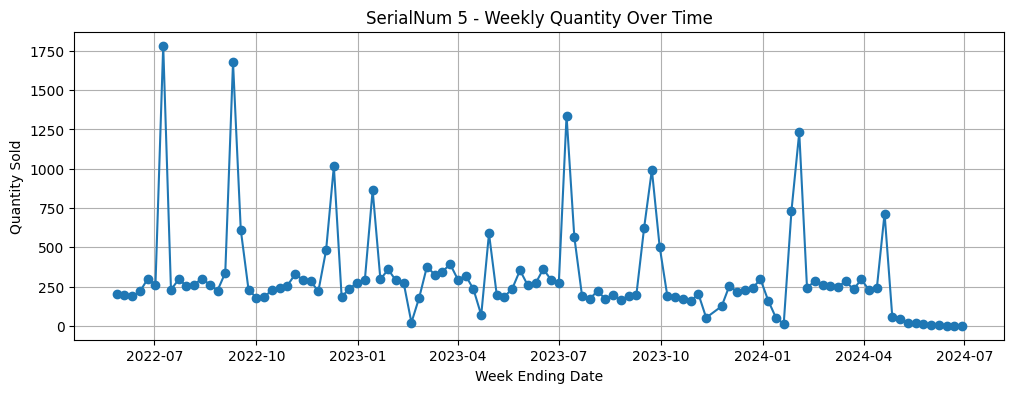

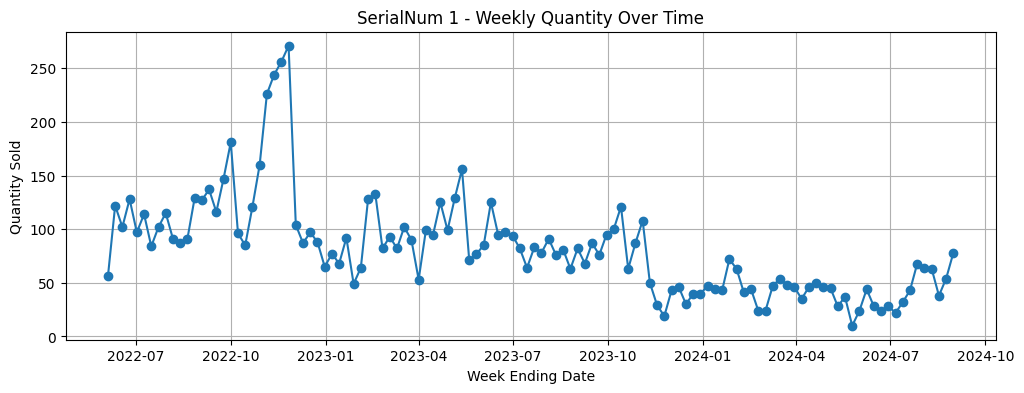

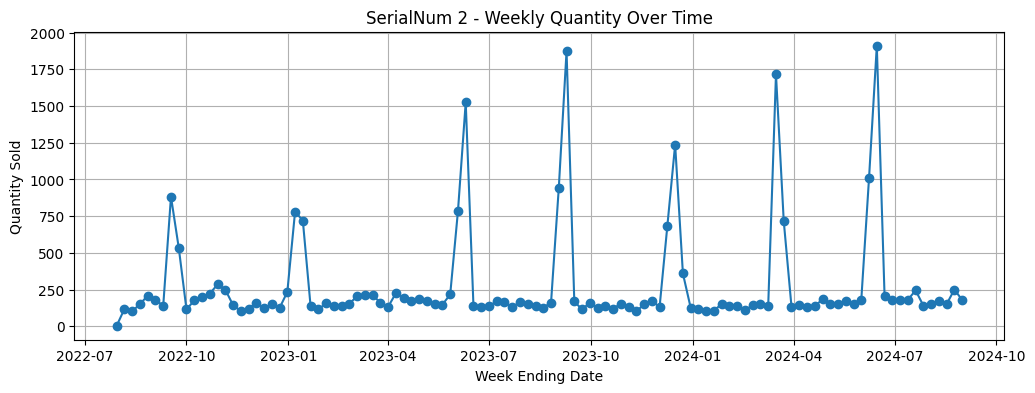

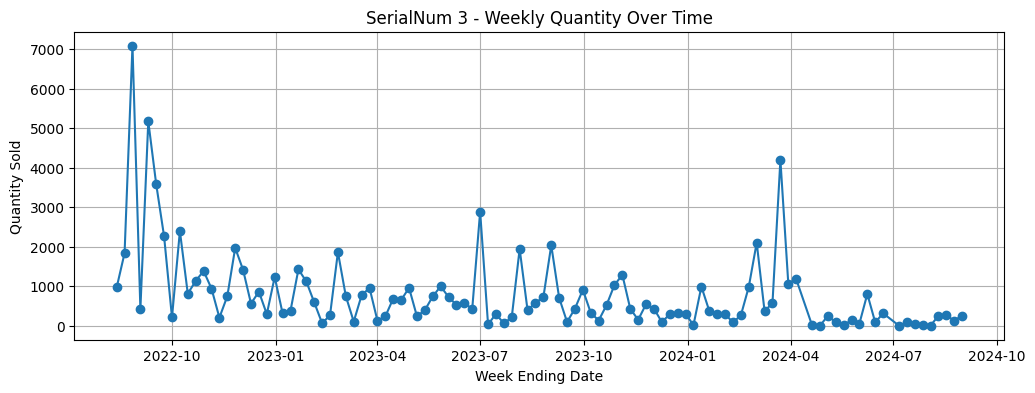

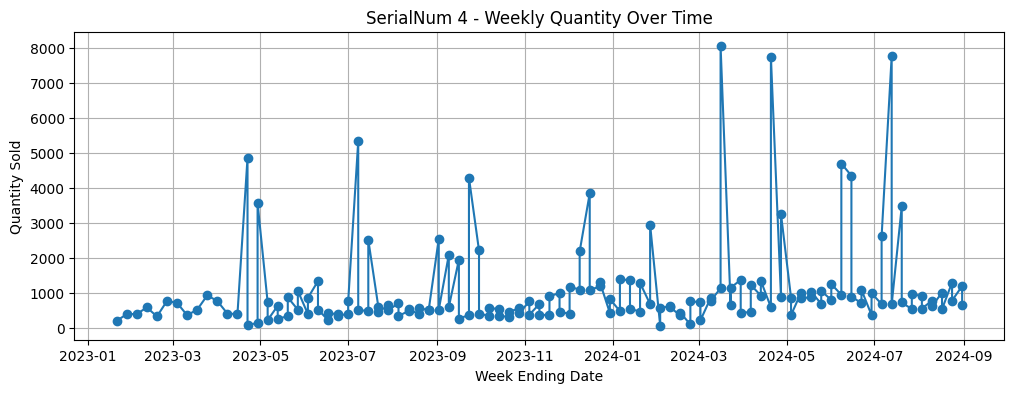

In [ ]:
import matplotlib.pyplot as plt

serials = df['SerailNum'].unique()

for serial in serials:
    df_serial = df[df['SerailNum'] == serial].sort_values('weekend_date')

    plt.figure(figsize=(12, 4))
    plt.plot(df_serial['weekend_date'], df_serial['quantity'], marker='o', linestyle='-')

    plt.title(f'SerialNum {serial} - Weekly Quantity Over Time')
    plt.xlabel('Week Ending Date')
    plt.ylabel('Quantity Sold')
    plt.grid(True)
    plt.show()


In this step, we identify potential outliers in the quantity column for each SerialNum using the Interquartile Range (IQR) method. For each SerialNum:

- We calculate the first quartile (Q1) and third quartile (Q3).

- The IQR is defined as Q3 − Q1.

- Any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is flagged as a potential outlier.

We count and display the number of such outliers for each SerialNum. This step is important because extreme values in sales data can influence model performance, especially in regression-based forecasting. Based on this insight, we may later consider applying outlier handling techniques such as capping during feature engineering.

In [ ]:
for serial in serials:
    df_serial = df[df['SerailNum'] == serial]
    q1 = df_serial['quantity'].quantile(0.25)
    q3 = df_serial['quantity'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_serial[(df_serial['quantity'] < lower_bound) | (df_serial['quantity'] > upper_bound)]
    print(f'\nSerialNum {serial} has {len(outliers)} potential outliers.')



SerialNum 5 has 24 potential outliers.

SerialNum 1 has 5 potential outliers.

SerialNum 2 has 16 potential outliers.

SerialNum 3 has 8 potential outliers.

SerialNum 4 has 19 potential outliers.


### Outlier Check Summary

- Used the IQR rule to identify potential outliers in weekly quantity sold.
- Results:
    - SerialNum 1: 5 potential outliers
    - SerialNum 2: 16 potential outliers
    - SerialNum 3: 8 potential outliers
    - SerialNum 4: 19 potential outliers
    - SerialNum 5: 24 potential outliers
- Interpretation:
    - SerialNums 4 and 5 show more frequent sales spikes, likely due to promotions or demand variability.
    - SerialNum 1 appears more stable.
- Next Steps:
    - Consider capping, transforming, or using robust models during modeling phase.


### EDA Summary and Insights

- **Data Structure**
    - Weekly sales data from [START_DATE] to [END_DATE].
    - 5 unique SerialNums (products), each treated as a separate time series.
    - 3 sales channels, 2 brands, 3 categories, 4 sub-categories.

- **Date Cleaning**
    - Original 'weekend_date' column included time component (e.g., "00:00"), which was removed.
    - Converted all dates to consistent datetime format with day-first parsing.
    - Data was sorted chronologically.

- **Missing Weeks Analysis**
    - Checked for gaps in weekly intervals per SerialNum.
    - 3 of 5 SerialNums had perfect weekly coverage.
    - SerialNum 5 missing 1 week, SerialNum 3 missing 2 weeks.
    - Plan: Fill these missing weeks with quantity = 0 in data preparation.

- **Outlier Detection**
    - Used IQR rule to detect potential outliers in quantity.
    - SerialNums 4 and 5 show higher counts of outliers (e.g., sales spikes), likely reflecting promotions or demand variability.
    - Plan: Consider capping or using robust models that can handle outliers.

- **Time Series Plots**
    - Visual exploration showed general trends and possible seasonality in some products.
    - Certain products appear to have regular seasonal demand increases.

- **Implications for Modeling**
    - Must ensure gap-free weekly series for each SerialNum.
    - May model each SerialNum separately or include channel/brand features in a multivariate approach.
    - Need to decide on treatment of outliers (keep, cap, flag).
    - Seasonality terms may improve forecasting accuracy.


Finally, we save the cleaned dataset so that the Modeling notebook can directly load clean, sorted, and standardized data without repeating EDA steps.

In [ ]:
# Suggestion: final cleaned dataframe
df.to_csv('cleaned_Assessment.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_Assessment.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>